In [ ]:
##Description
# Project Goal: Portfolio method that will be useful to the average investor who does not have enough time nor the 
# skills necessary to fully study the market and how it works.
# Source: Kaggle dataset: S&P 500 stocks data from April 1, 2013 - December 30, 2016


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from scipy.signal import argrelextrema
import math
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Data Preprocessing

In [80]:
# Read in the S&P500 Index daily prices
spy = pd.read_csv("./SP500.csv")

# Read in the data for the daily split adjusted price for every stock in the S&P500 since 2010
sp500 = pd.read_csv("./prices-split-adjusted.csv")

In [81]:
spy.head()

,DATE,SP500
0,2013-03-22,1556.89
1,2013-03-25,1551.69
2,2013-03-26,1563.77
3,2013-03-27,1562.85
4,2013-03-28,1569.19


In [82]:
print(min(pd.DatetimeIndex(spy['DATE']).year))
print(max(pd.DatetimeIndex(spy['DATE']).year))
spy13 = spy[pd.DatetimeIndex(spy['DATE']).year == 2013]
print(min(pd.DatetimeIndex(spy13['DATE']).month))

2013
2018
3


In [83]:
sp500

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [84]:
print(max(pd.DatetimeIndex(sp500['date']).year))
sp16  = sp500[pd.DatetimeIndex(sp500['date']).year == 2016]
print(max(pd.DatetimeIndex(sp16['date']).month))
sp13  = sp500[pd.DatetimeIndex(sp500['date']).year == 2013]
print(min(pd.DatetimeIndex(sp13['date']).month))

2016
12
1


In [85]:
spy = spy[((pd.DatetimeIndex(spy['DATE']).year > 2013) | ((pd.DatetimeIndex(spy['DATE']).month > 6) & (pd.DatetimeIndex(spy['DATE']).year == 2013))) & (pd.DatetimeIndex(spy['DATE']).year < 2017)]
sp500 = sp500[(pd.DatetimeIndex(sp500['date']).year > 2013) | ((pd.DatetimeIndex(sp500['date']).year == 2013) & (pd.DatetimeIndex(sp500['date']).month > 3))]

In [86]:
set(pd.DatetimeIndex(spy['DATE']).year)

{2013, 2014, 2015, 2016}

In [87]:
set(pd.DatetimeIndex(sp500['date']).year)

{2013, 2014, 2015, 2016}

In [88]:
sp500.drop(['open', 'low', 'high', 'volume'], inplace = True, axis = 1)
sp500 = sp500.set_index('date')
sp500.head()

C:\Users\coles\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,symbol,close
date,,
2016-01-05,WLTW,125.839996
2016-01-06,WLTW,119.980003
2016-01-07,WLTW,114.949997
2016-01-08,WLTW,116.620003
2016-01-11,WLTW,114.970001


In [89]:
spy = spy.set_index('DATE')
spy = spy[spy["SP500"] != '.']
spy['SP500'] = pd.to_numeric(spy['SP500'])
spy.head()

,SP500
DATE,
2013-07-01,1614.96
2013-07-02,1614.08
2013-07-03,1615.41
2013-07-05,1631.89
2013-07-08,1640.46


# Functions

In [90]:
def RSS_trend(nums):
    rise = (nums[-1] - nums[0])/len(nums)
    rss = 0
    for i in range(0,len(nums)):
        rss = (nums[i] - (nums[0] + i*rise))**2
    #rss = rss/len(nums)
    return rss

def ratio(prices):
    error = RSS_trend(prices)
    return (((((prices[-1] - prices[0])/prices[0])*100)-2)/(error+.1))

def KDE_cluster(df):
    kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(array(df['ratio']).reshape(-1,1))
    s = linspace(0,max(df['ratio']))
    e = kde.score_samples(s.reshape(-1,1))
    #print(plt.plot(s, e))
    minimum = s[argrelextrema(e, np.less)[0]][-4]
    picks = list(df[df['ratio'] > minimum]['ticker'])
    return picks

def kmeans_cluster(df):
    kmeans = KMeans(n_clusters=5, random_state=0).fit(array(stocks['ratio']).reshape(-1,1))
    kmeans.labels_[0]
    picks = list(stocks[kmeans.labels_ == kmeans.labels_[0]]['ticker'])
    return picks

In [91]:
sp13q2 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2013) & ((pd.DatetimeIndex(sp500.index.values).month == 4) | (pd.DatetimeIndex(sp500.index.values).month == 5) | (pd.DatetimeIndex(sp500.index.values).month == 6))]
sp13q3 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2013) & ((pd.DatetimeIndex(sp500.index.values).month == 7) | (pd.DatetimeIndex(sp500.index.values).month == 8) | (pd.DatetimeIndex(sp500.index.values).month == 9))]
sp13q4 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2013) & ((pd.DatetimeIndex(sp500.index.values).month == 10) | (pd.DatetimeIndex(sp500.index.values).month == 11) | (pd.DatetimeIndex(sp500.index.values).month == 12))]
sp14q1 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2014) & ((pd.DatetimeIndex(sp500.index.values).month == 1) | (pd.DatetimeIndex(sp500.index.values).month == 2) | (pd.DatetimeIndex(sp500.index.values).month == 3))]
sp14q2 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2014) & ((pd.DatetimeIndex(sp500.index.values).month == 4) | (pd.DatetimeIndex(sp500.index.values).month == 5) | (pd.DatetimeIndex(sp500.index.values).month == 6))]
sp14q3 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2014) & ((pd.DatetimeIndex(sp500.index.values).month == 7) | (pd.DatetimeIndex(sp500.index.values).month == 8) | (pd.DatetimeIndex(sp500.index.values).month == 9))]
sp14q4 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2014) & ((pd.DatetimeIndex(sp500.index.values).month == 10) | (pd.DatetimeIndex(sp500.index.values).month == 11) | (pd.DatetimeIndex(sp500.index.values).month == 12))]
sp15q1 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2015) & ((pd.DatetimeIndex(sp500.index.values).month == 1) | (pd.DatetimeIndex(sp500.index.values).month == 2) | (pd.DatetimeIndex(sp500.index.values).month == 3))]
sp15q2 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2015) & ((pd.DatetimeIndex(sp500.index.values).month == 4) | (pd.DatetimeIndex(sp500.index.values).month == 5) | (pd.DatetimeIndex(sp500.index.values).month == 6))]
sp15q3 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2015) & ((pd.DatetimeIndex(sp500.index.values).month == 7) | (pd.DatetimeIndex(sp500.index.values).month == 8) | (pd.DatetimeIndex(sp500.index.values).month == 9))]
sp15q4 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2015) & ((pd.DatetimeIndex(sp500.index.values).month == 10) | (pd.DatetimeIndex(sp500.index.values).month == 11) | (pd.DatetimeIndex(sp500.index.values).month == 12))]
sp16q1 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2016) & ((pd.DatetimeIndex(sp500.index.values).month == 1) | (pd.DatetimeIndex(sp500.index.values).month == 2) | (pd.DatetimeIndex(sp500.index.values).month == 3))]
sp16q2 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2016) & ((pd.DatetimeIndex(sp500.index.values).month == 4) | (pd.DatetimeIndex(sp500.index.values).month == 5) | (pd.DatetimeIndex(sp500.index.values).month == 6))]
sp16q3 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2016) & ((pd.DatetimeIndex(sp500.index.values).month == 7) | (pd.DatetimeIndex(sp500.index.values).month == 8) | (pd.DatetimeIndex(sp500.index.values).month == 9))]
sp16q4 = sp500[(pd.DatetimeIndex(sp500.index.values).year == 2016) & ((pd.DatetimeIndex(sp500.index.values).month == 10) | (pd.DatetimeIndex(sp500.index.values).month == 11) | (pd.DatetimeIndex(sp500.index.values).month == 12))]
quarters = [sp13q2, sp13q3, sp13q4, sp14q1, sp14q2, sp14q3, sp14q4, sp15q1, sp15q2, sp15q3, sp15q4, sp16q1, sp16q2, sp16q3, sp16q4]
#quarters = [sp15q2]

# Running

In [92]:
investment_kde = 100000
investment_kmeans = 100000
portfolio = pd.DataFrame(index = pd.bdate_range(start = "2013-07-01", end = "2016-12-30"), columns = ["kde", "kmeans"])
assets_kde = pd.DataFrame(columns = ["ticker", "count"])
assets_kmeans = pd.DataFrame(columns = ["ticker", "count"])

In [93]:
avg_kde = 0
avg_kmeans = 0

epoch = 0
for quarter in quarters:
    quarter = quarter.pivot(columns='symbol')
    quarter.columns = [col[1] for col in quarter.columns]
    quarter.fillna(method = 'ffill', inplace = True)
    quarter.fillna(method = 'bfill', inplace = True)
    
   
    if epoch > 0:
        ## track performance of previous quarter predictions here
        avg_kde = avg_kde + len(assets_kde['ticker'])
        split = investment_kde/len(assets_kde['ticker'])
        for tick in assets_kde['ticker']:
            assets_kde.loc[assets_kde['ticker'] == tick, 'count'] = math.floor(split/quarter[tick][0])
        kde_portfolio_prices = quarter[list(assets_kde['ticker'])]
        for j in kde_portfolio_prices.columns.values:
            kde_portfolio_prices[j] = kde_portfolio_prices[j]*int(assets_kde.loc[assets_kde['ticker'] == j, 'count'])
        for i in kde_portfolio_prices.index.values:
            portfolio.loc[i, "kde"] = sum(list(kde_portfolio_prices[kde_portfolio_prices.index.values == i].loc[i]))
            
        investment_kde = sum(list(kde_portfolio_prices.iloc[-1]))
        assets_kde = pd.DataFrame(columns = ["ticker", "count"])
        
        avg_kmeans = avg_kmeans + len(assets_kmeans['ticker'])
        split = investment_kmeans/len(assets_kmeans['ticker'])
        for tick in assets_kmeans['ticker']:
            assets_kmeans.loc[assets_kmeans['ticker'] == tick, 'count'] = math.floor(split/quarter[tick][0])
        kmeans_portfolio_prices = quarter[list(assets_kmeans['ticker'])]
        for x in kmeans_portfolio_prices.columns.values:
            kmeans_portfolio_prices[x] = kmeans_portfolio_prices[x]*int(assets_kmeans.loc[assets_kmeans['ticker'] == x, 'count'])
        for y in kmeans_portfolio_prices.index.values:
            portfolio.loc[y, "kmeans"] = sum(list(kmeans_portfolio_prices[kmeans_portfolio_prices.index.values == y].loc[y]))
            
        investment_kmeans = sum(list(kmeans_portfolio_prices.iloc[-1]))
        assets_kmeans = pd.DataFrame(columns = ["ticker", "count"])
        
        
    vals = {key: 0 for key in list(quarter.columns.values)}
    for name in list(quarter.columns.values):
        vals[name] = ratio(list(quarter[name]))
    
    stocks = pd.DataFrame(list(vals.items()), columns = ['ticker', 'ratio'])
    stocks.sort_values(by=['ratio'], inplace = True, ascending = False)
    
    # do kde
    assets_kde['ticker'] = KDE_cluster(stocks)
    
    # do kmeans
    assets_kmeans['ticker'] = kmeans_cluster(stocks)
    
    
    
    
    epoch = epoch + 1
    #### Testing
    #prices = quarter
    #ratios = stocks
    
avg_kde = avg_kde/epoch
avg_kmeans = avg_kmeans/epoch

C:\Users\coles\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\coles\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [94]:
print(avg_kde)
print(avg_kmeans)

10.2
29.333333333333332


In [95]:
spy["SP500"] = (spy["SP500"]/spy["SP500"][0])*100 - 100
portfolio["kde"] = (portfolio["kde"]/portfolio["kde"][0])*100 - 100
portfolio["kmeans"] = (portfolio["kmeans"]/portfolio["kmeans"][0]) * 100 - 100

# Plots and stats

Text(0.5,1,'Portfolio Value')

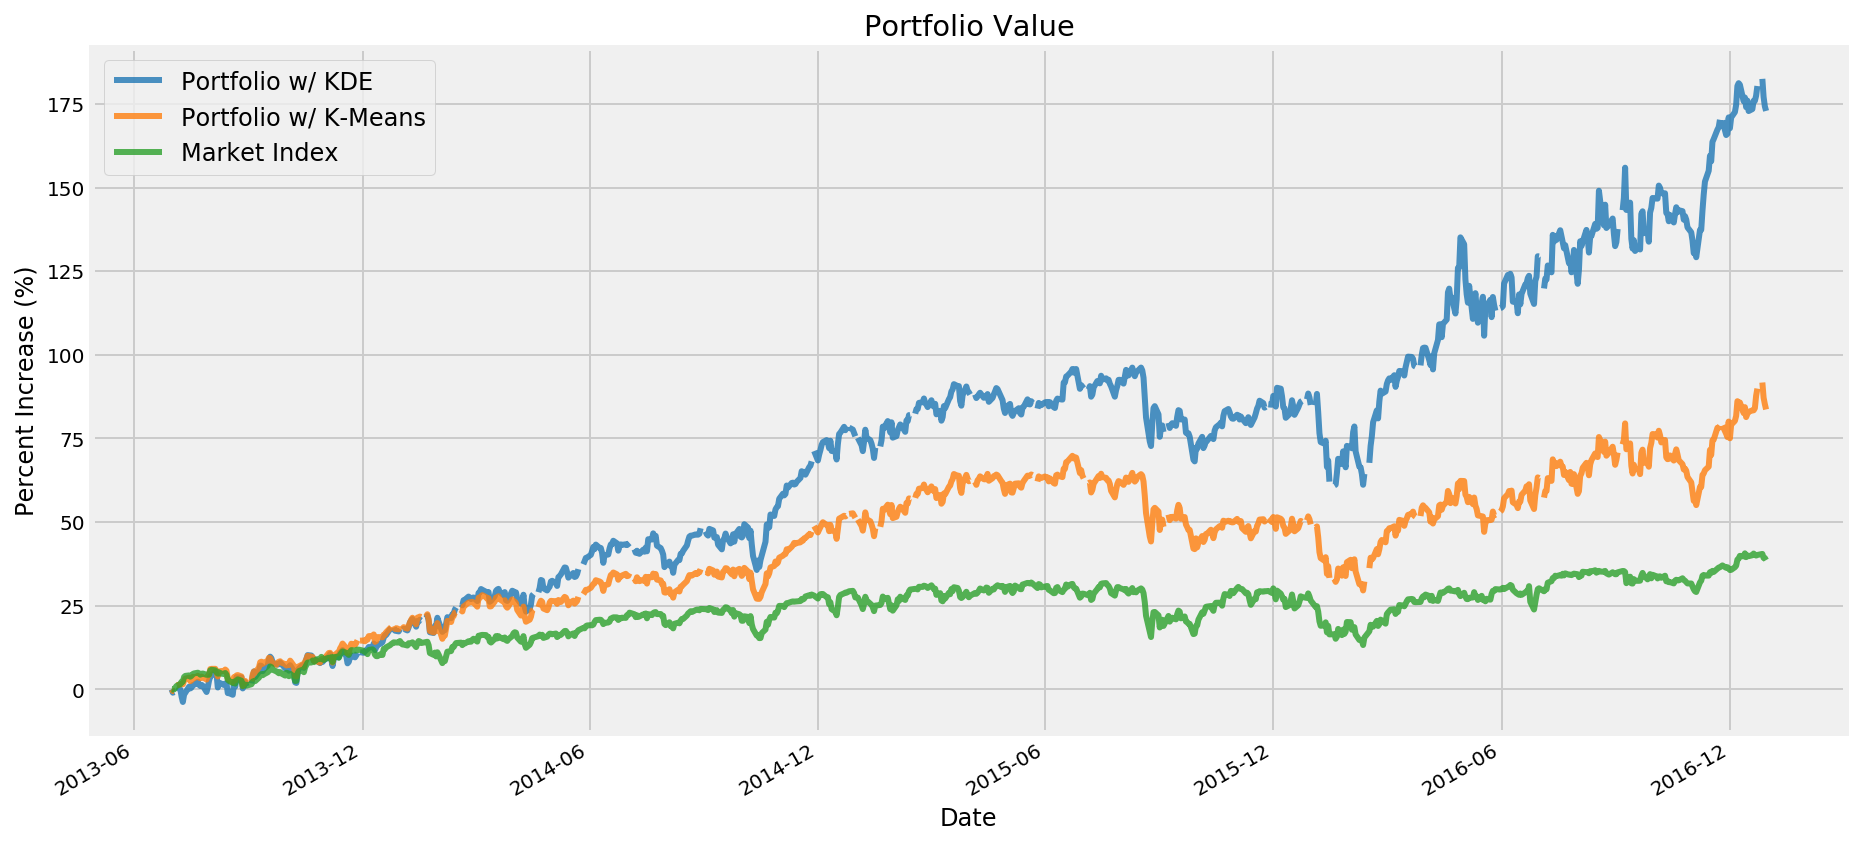

In [96]:
plt.figure(figsize=(14, 7))
colors = ['tab:blue', 'tab:orange', 'tab:green']
plt.plot(pd.to_datetime(portfolio.index), portfolio["kde"], lw=3, label = "Portfolio w/ KDE", alpha=0.8, color = colors[0])
plt.plot(pd.to_datetime(portfolio.index), portfolio["kmeans"], lw=3, label = "Portfolio w/ K-Means", alpha=0.8, color = colors[1])
plt.plot(pd.to_datetime(spy.index), spy["SP500"], lw=3, label = "Market Index", alpha=0.8, color = colors[2])
plt.gcf().autofmt_xdate()
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Percent Increase (%)')
plt.xlabel("Date")
plt.title('Portfolio Value')

# Testing stuff

In [102]:
## Testing
sp500_16 = sp13q2.pivot(columns='symbol')
sp500_16.columns = [col[1] for col in sp500_16.columns]
sp500_16.fillna(method = 'ffill', inplace = True)
sp500_16.fillna(method = 'bfill', inplace = True)
sp500_16.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-04-01,29.277540,16.67,82.339996,61.272858,41.119999,51.639999,35.310001,75.849998,43.380001,45.410000,...,37.650002,90.769997,42.110001,8.60,27.250000,23.500000,51.164632,75.129997,24.780001,32.590000
2013-04-02,29.084406,15.74,82.830002,61.398571,40.709999,52.410000,36.119999,76.669998,43.849998,45.200001,...,37.279999,90.580002,41.619999,8.85,27.219999,23.780001,50.431344,75.330002,24.480000,32.549999
2013-04-03,28.984263,15.53,82.120003,61.712856,40.570000,51.689999,36.320000,76.599998,43.700001,44.060001,...,36.209999,89.930000,40.869999,8.56,27.120001,23.379999,48.554998,74.459999,23.879999,32.529999
2013-04-04,29.620888,15.69,82.199997,61.102856,41.599998,51.820000,36.650002,76.610001,44.209999,43.740002,...,36.810001,89.769997,41.230000,8.66,27.719999,23.520000,48.691590,75.250000,24.139999,31.840000
2013-04-05,29.713877,15.72,80.949997,60.457142,41.310001,52.080002,36.310001,76.250000,43.380001,43.610001,...,36.360001,89.010002,40.730000,8.63,27.600000,23.299999,48.145219,74.029999,23.879999,31.959999


Text(0.5,1,'2015 Daily Asset Price')

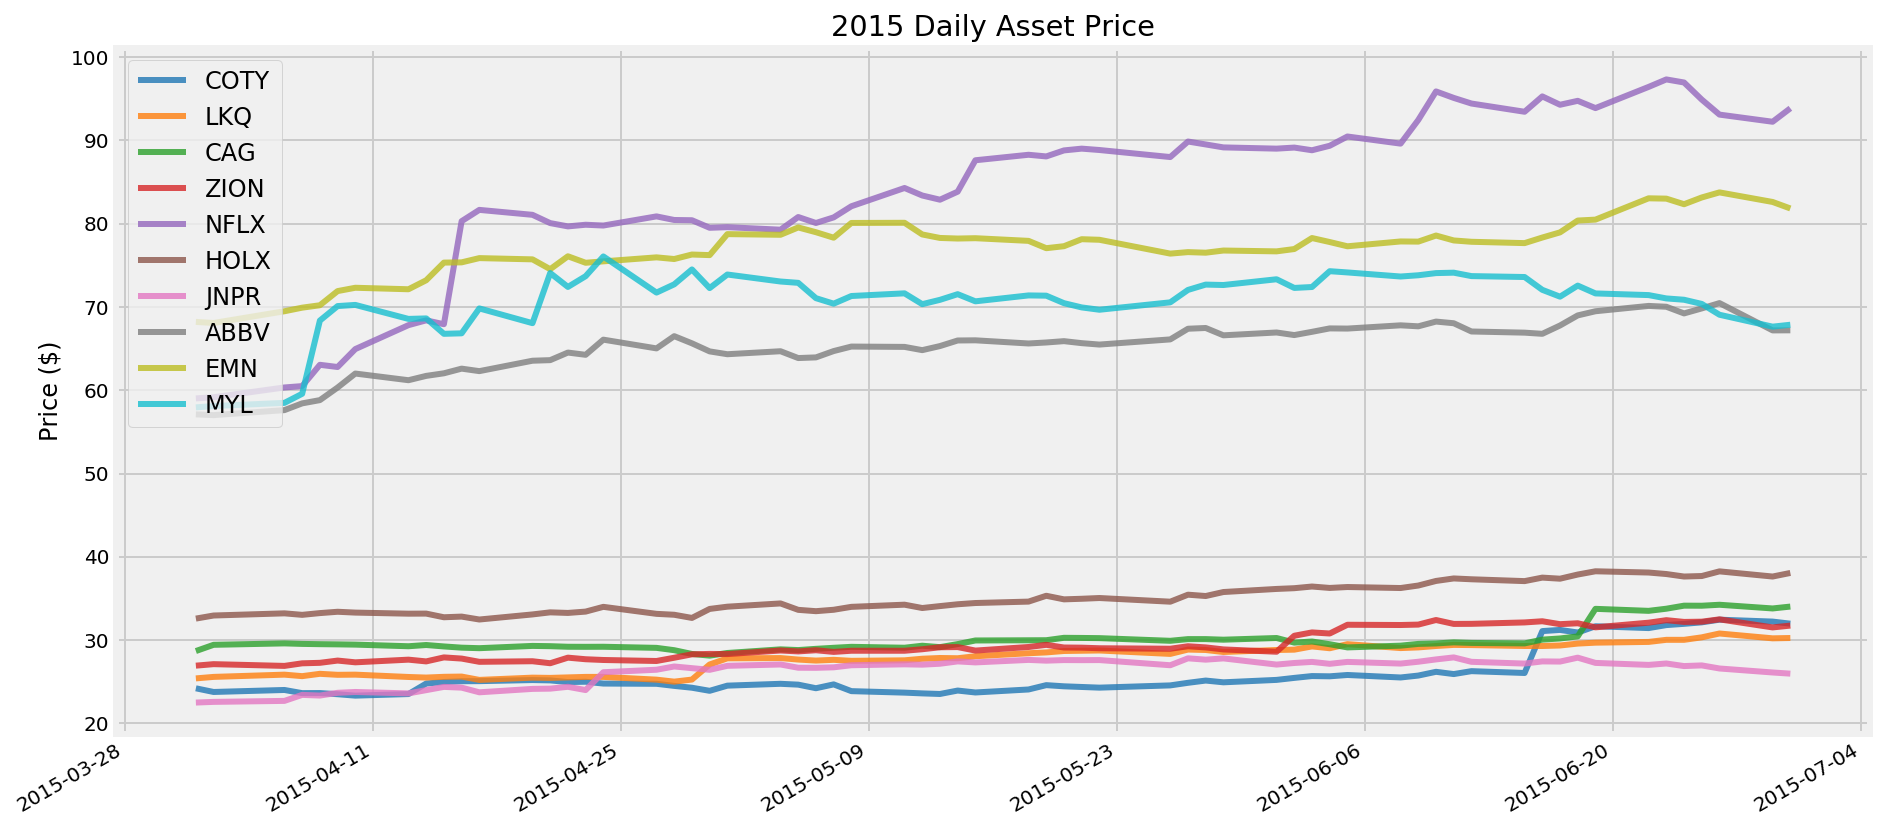

In [120]:
ratios
top_performers = ratios.nlargest(10, 'ratio')
asset_prices = prices[list(top_performers['ticker'])]

plt.figure(figsize=(14, 7))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
i = 0
for symbol in asset_prices.columns.values:
    plt.plot(pd.to_datetime(asset_prices.index), asset_prices[symbol], lw=3, label = symbol, alpha=0.8, color = colors[i])
    i = i + 1
plt.gcf().autofmt_xdate()
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price ($)')
plt.title('2015 Daily Asset Price')

Text(0,0.5,'log Density')

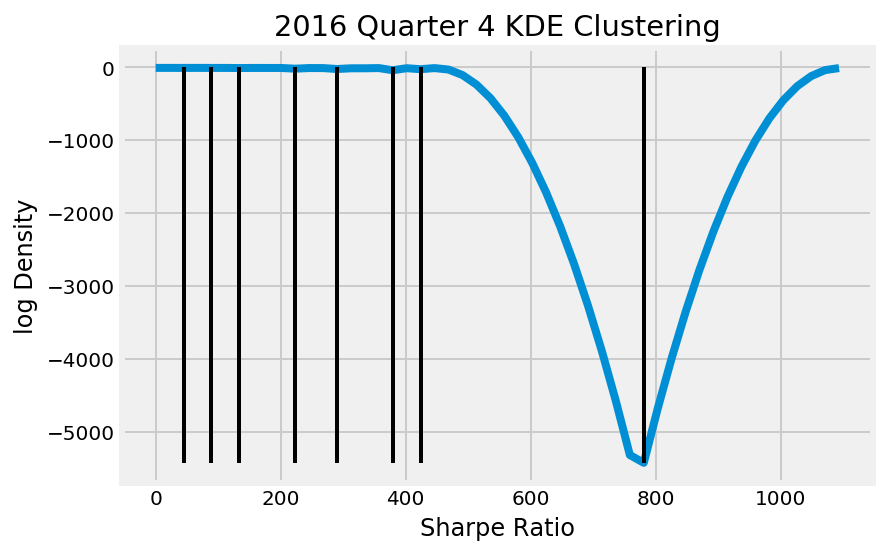

In [181]:
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(array(stocks['ratio']).reshape(-1,1))
s = linspace(0,max(stocks['ratio']))
e = kde.score_samples(s.reshape(-1,1))
plt.plot(s, e)
minimum = s[argrelextrema(e, np.less)[0]]
for i in minimum:
    plt.plot([i, i], [min(e), 0], 'k-', lw=2)
plt.title("2016 Quarter 4 KDE Clustering")
plt.xlabel("Sharpe Ratio")
plt.ylabel("log Density")

In [174]:
min(e)

-5429.845445490755

In [145]:
picks

['COTY',
 'LKQ',
 'CAG',
 'ZION',
 'NFLX',
 'HOLX',
 'JNPR',
 'ABBV',
 'EMN',
 'MYL',
 'SBUX',
 'HCA',
 'HAS',
 'EA',
 'AVY']

In [108]:
minimum

array([ 18.91763437,  47.29408593,  66.2117203 ,  94.58817186,
       122.96462342, 151.34107497, 170.25870935, 217.55279527,
       274.30569839, 368.89387025])

In [33]:
spy

,SP500
DATE,
2013-07-01,NaN
2013-07-02,NaN
2013-07-03,NaN
2013-07-05,NaN
2013-07-08,NaN
2013-07-09,NaN
2013-07-10,NaN
2013-07-11,NaN
2013-07-12,NaN


In [185]:
spy

,SP500
DATE,
2013-07-01,0.000000
2013-07-02,-0.054491
2013-07-03,0.027864
2013-07-05,1.048323
2013-07-08,1.578986
2013-07-09,2.313370
2013-07-10,2.331946
2013-07-11,3.718978
2013-07-12,4.039109


In [76]:
ratio(list(portfolio["kde"]))

0.004795208894245626

In [77]:
ratio(portfolio["kmeans"])

0.009898462769570333

In [78]:
ratio(spy["SP500"])

C:\Users\coles\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


inf